In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import numpy as np
#importing required libraries

In [116]:
df = pd.read_csv('../data/train.csv') #load raw csv file

In [117]:
#checking basic info about the data set to undestand it

In [118]:
df.head() #shows first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
df.shape #shows how many rows and columns are there

(891, 12)

In [120]:
df.columns #provide all column name s available

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [121]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [122]:
df.isnull().sum() #get the missing values count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
df['Survived'].value_counts(normalize=True)#as our target is Survived Column we get the class balance

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [124]:
# as we get the basic info we can visually represent the data to undestand more about the data

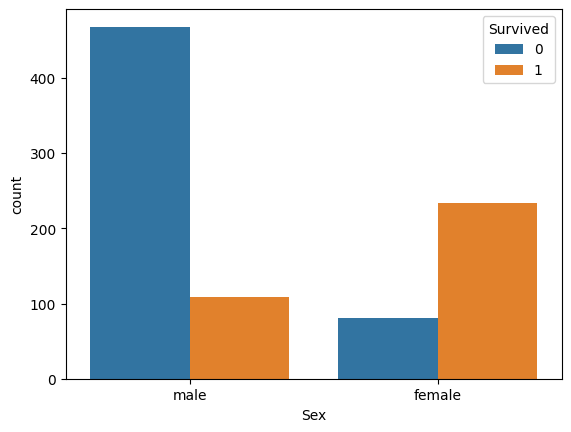

In [125]:
sns.countplot(data=df,x="Sex",hue="Survived") # Visual representaion of Survival by gender
plt.show()

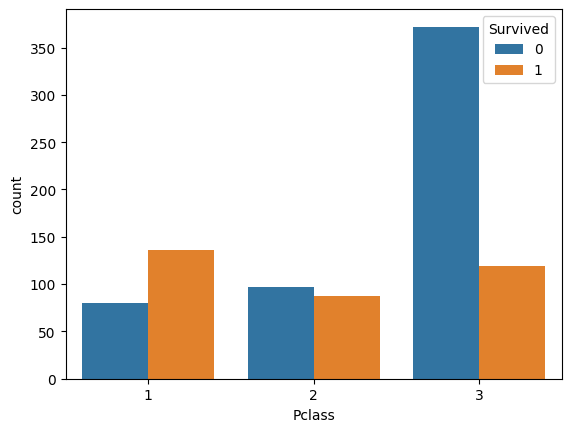

In [126]:
sns.countplot(data=df,x="Pclass",hue="Survived") # Visual representaion of Survival by Passenger Class
plt.show()

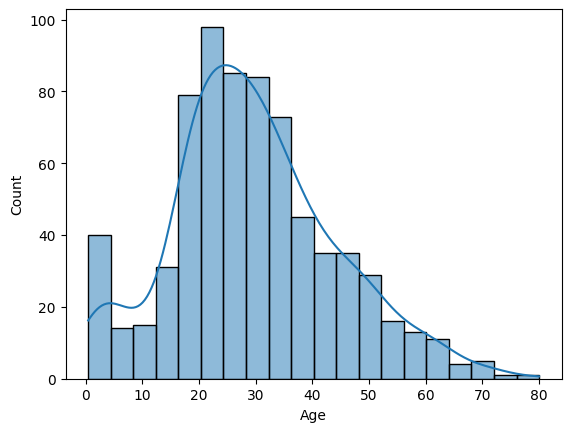

In [127]:
sns.histplot(df["Age"].dropna(), kde=True)# This helps to visualize the Age distribution 
plt.show()

In [128]:
# Handling missing values below

In [129]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
df = df.drop("Cabin",axis=1,errors='ignore') # as Cabin has too much missing value we are removing it

In [131]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [132]:
df["Age"].fillna(df["Age"].median(),inplace=True) #filling Age's missing data with meadian value

C:\Users\Lasi\AppData\Local\Temp\ipykernel_11316\1552443900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True) #filling Age's missing data with meadian value


In [133]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

C:\Users\Lasi\AppData\Local\Temp\ipykernel_11316\548196730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


In [134]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [135]:
# PassengerID ,Ticket,Name, Columns are not usefull for prediction Hence removing it

In [136]:
df.drop(columns=["Ticket", "Name", "PassengerId"], inplace=True)

In [137]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [138]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [139]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [140]:
#As we completed and prepared usefull data set, Spliting the data

In [141]:
X = df.drop("Survived",axis=1) # Selecting all columns data except Survive
y = df["Survived"] # Selecting Survived column data only, (Target)

In [142]:
numeric_features = ["Age", "Fare", "SibSp", "Parch", "FamilySize"]
categorical_features = ["Sex", "Pclass", "Embarked"]

In [143]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

In [144]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape) #Splitting data for train and test perposes and shows the shape of two data set

Train shape: (712, 8)
Test shape: (179, 8)


In [146]:
#Using Logistic Regression,Random Forest , SVM as Models

In [147]:
models = {
    "Logistic Regression": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]),
    "Random Forest": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "SVM": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC(kernel="rbf", probability=True, random_state=42))
    ])
}



In [149]:
 #Doing Cross validation and get Mean Accuracy of the algorithms
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression: Mean CV Accuracy = 0.8020 (+/- 0.0148)
Random Forest: Mean CV Accuracy = 0.8076 (+/- 0.0170)
SVM: Mean CV Accuracy = 0.8202 (+/- 0.0276)


In [153]:
#SVM Algorithm has highest accuracy , but we will train the algorithm more and get differebt mettrics to compare


In [150]:
results = {} #result variable to store result data

for name, model in models.items():
    model.fit(X_train, y_train)              # Training models with training data which is already splitted
    preds = model.predict(X_test)            # Predict on unseen test data

    # Calculate metrics
    acc = accuracy_score(y_test, preds) # accuracy
    prec = precision_score(y_test, preds) #Pressision
    rec = recall_score(y_test, preds) #Recall (Sensityvity)
    f1 = f1_score(y_test, preds) # Harmonic mean of Pression and recall

    # Store results in dictionary
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

    # Print detailed report
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[98 12]
 [23 46]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[95 15]
 [18 51]]

SVM Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                 

In [151]:
#Comparing results to choose best model after training and testing

In [154]:

results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="Accuracy", ascending=False))


                     Accuracy  Precision    Recall        F1
SVM                  0.826816   0.816667  0.710145  0.759690
Random Forest        0.815642   0.772727  0.739130  0.755556
Logistic Regression  0.804469   0.793103  0.666667  0.724409


In [97]:
#SVM algorithm is the best model according to accuracy hence saving it using jolib

In [155]:
# Use SVM pipeline as the best model
best_model = models["SVM"]

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Save the fitted pipeline
joblib.dump(best_model, "../best_svm_pipeline.joblib")
print("SVM pipeline model saved successfully!")


SVM pipeline model saved successfully!
